# Example 14.5: Cooling with Dehumidification

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An air-conditioning system takes in atmospheric air at $90^\circ\mathrm{F}$, $1\ \mathrm{atm}$ with an $80\%$ relative humidity at a rate of $25\ \mathrm{CFM}$ and cools it to a temperature of $65^\circ\mathrm{F}$.  The condensate leaves as saturated liquid water at $65^\circ\mathrm{F}$. Determine:
* (a) The relative humidity of the exiting air
* (b) The specific humidity of the exiting air
* (c) The mass flow rate of condensate leaving system
* (d) The required rate of heat transfer to the cools

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074218&node=10465120&a=2126777173&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.humidair_USCS_F import *

In [4]:
help(humidair)

Help on Properties in module kilojoule.humidair object:

class Properties(builtins.object)
 |  Properties(p=None, unit_system='kSI_C')
 |  
 |  A class to return thermodynamic properties for a real fluid
 |  
 |  :param p: pressure (Default value = 1 atm)
 |  :param unit_system: units for return values - one of 'SI_C','SI_K','English_F','English_R' (Default = 'SI_C')
 |  :returns: an object with methods to evaluate real fluid properties
 |  
 |  Methods defined here:
 |  
 |  T(self, *args, **kwargs)
 |      Dry-bulb Temperature from two independent intensive properties
 |      
 |      example:
 |      >> humair.T(rel_hum=rel_hum_2, h=h_1)
 |      
 |      :param **kwargs: any two dimensional quantities of p,v,u,h,s,x,u_molar,h_molar,s_molar,d_molar
 |      :returns: Dry-bulb Temperature as a dimensional quantity
 |  
 |  T_dp(self, *args, **kwargs)
 |      Dew-point Temperature from two independent intensive properties
 |      
 |      example:
 |      >> humair.T_dp(rel_hum=rel_hum_

### Given

In [4]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(90,'degF')
rel_hum[1] = Quantity(0.8,'')
Vdot[1] = Quantity(25,'cfm')

# State 2 - Exit
T[2] = Quantity(65,'degF')
rel_hum[2] = Quantity(1,'')

Summary();

<IPython.core.display.Latex object>

,$T$ [°F],$\dot{V}$ [ft³/s],$rel_{hum}$ []
1,90,0.416667,0.8
2,65,-,1.0


In [5]:
states.fix(1, humidair, T=T[1], rel_hum=rel_hum[1])
states.fix(2, humidair, T=T[2], rel_hum=rel_hum[2])

Summary();

<IPython.core.display.Latex object>

,$T$ [°F],$v$ [ft³/lb_dry_air],$h$ [Btu/lb_dry_air],$s$ [Btu/lb_dry_air/°R],$\dot{V}$ [ft³/s],$T_{wb}$ [°F],$T_{dp}$ [°F],$rel_{hum}$ [],$\phi$ [],$\omega$ [lb_water/lb_dry_air]
1,90,14.402379,41.131766,0.079707,0.416667,84.539683,82.99274,0.8,0.8,0.024717
2,65,13.503172,22.384740,0.044642,-,65.000000,65.00000,1.0,1.0,0.013272


#### (a) Relative humidity at exit

\begin{equation}
\phi_{\mathrm{exit}} = 100\%
\end{equation}

#### (b) Humidity ratio at exit

In [6]:
%%showcalc
omega[2] = omega[2]

\begin{align}
  {\omega}_{ {{2}} } &=  {\omega}_{ {{2}} }  = 0.013272\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}} 
\end{align}



#### (c) Water flow rate

In [7]:
%%showcalc
"Dry air mass flow rate"
mdot_a[1] = Vdot[1]/v[1]

"Water flow rate"
mdot_w['w'] = (mdot_a[1]*(omega[1]-omega[2])).to('lb_water/min')

Dry air mass flow rate
\begin{align}
  {\dot{m}_{a}}_{ {{1}} } &=  \frac{ {\dot{V}}_{ {{1}} } }{ {v}_{ {{1}} } } \\
    &= \frac{ 0.41667\ \frac{\mathrm{ft}^{3}}{\mathrm{s}} }{ 14.402\ \frac{\mathrm{ft}^{3}}{\mathrm{lb\_dry\_air}} }\\
    &= 0.02893\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}
\end{align}

Water flow rate
\begin{align}
  {\dot{m}_{w}}_{ {{w}} } &=   {\dot{m}_{a}}_{ {{1}} }  \cdot  \left(  {\omega}_{ {{1}} } - {\omega}_{ {{2}} }  \right)  \\
    &=  0.02893\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}  \cdot  \left(  0.024717\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}} - 0.013272\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}}  \right) \\
    &= 0.0003311\ \frac{\mathrm{lb\_water}}{\mathrm{s}}
\end{align}



#### (d) Cooling load

In [8]:
%%showcalc
"1st Law"
h_w['w'] = humidair.h_w(x=0,T=T[2])
Qdot_out = (mdot_a[1]*(h[1]-h[2]) + mdot_w['w']*h_w['w']).to('Btu/min')

1st Law
\begin{align}
  {h_{w}}_{ {{w}} } &=  \mathrm{ \underset{ humidair }{ h\_w } }\left( \mathrm{ x } = 0, \mathrm{ T } = {T}_{ {{2}} } \right)  = \mathrm{ \underset{ humidair }{ h\_w } }\left( \mathrm{ x } = 0, \mathrm{ T } = 65\ \mathrm{°F} \right) = 33.078\ \frac{\mathrm{Btu}}{\mathrm{lb\_water}}
\end{align}

\begin{align}
  \dot{Q}_{out} &=   {\dot{m}_{a}}_{ {{1}} }  \cdot  \left(  {h}_{ {{1}} } - {h}_{ {{2}} }  \right)  +  {\dot{m}_{w}}_{ {{w}} }  \cdot  {h_{w}}_{ {{w}} }  \\
    &=  0.02893\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}  \cdot  \left(  41.132\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}} - 22.385\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}}  \right)  +  0.0003311\ \frac{\mathrm{lb\_water}}{\mathrm{s}}  \cdot  33.078\ \frac{\mathrm{Btu}}{\mathrm{lb\_water}} \\
    &= 33.199\ \frac{\mathrm{Btu}}{\mathrm{min}}
\end{align}



### Psychrometric Chart

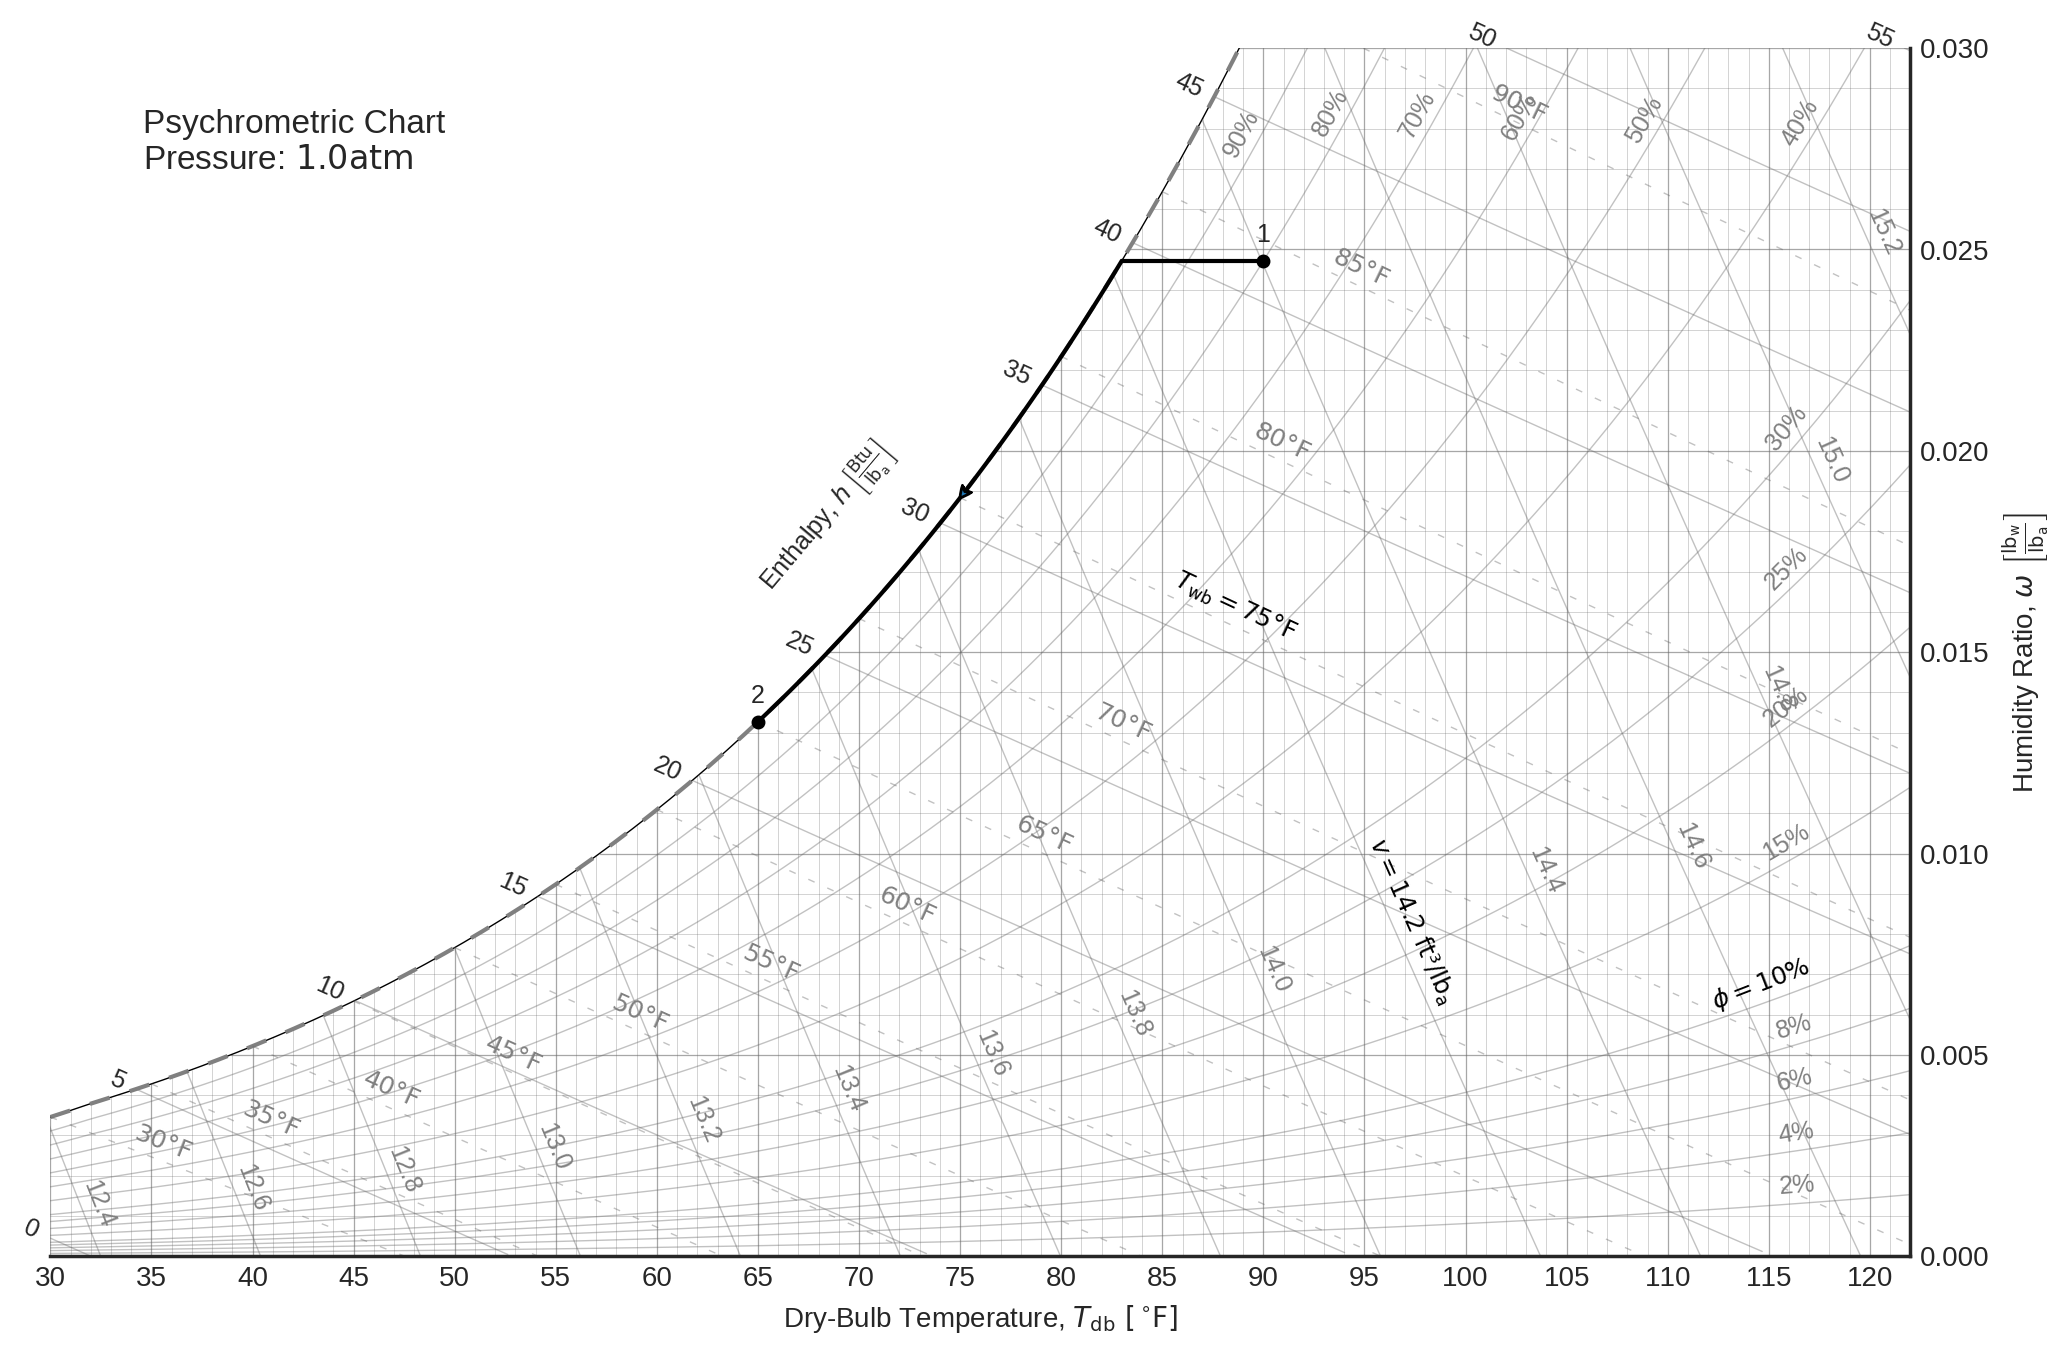

In [9]:
psych = humidair.psychrometric_chart(redraw=False)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2])

# Plot Processes
psych.plot_process(states[1],states[2],path='simple cooling');

In [11]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex14.5 Cooling with Dehumidification.ipynb"